# Visualizing complaints at the state level

## import necessary packages

In [10]:
import geopandas as gpd
import pandas as pd
from matplotlib import pyplot as plt

## import data

In [2]:
state_info = pd.read_csv('../data/complaints_per_state.csv')

In [4]:
state_info.head()

,state,count,population
0,SC,22687,4955925.0
1,AZ,30664,6949259.0
2,LA,18226,4663243.0
3,MN,15042,5527473.0
4,NJ,53767,8881845.0


In [5]:
states_gdf = gpd.read_file('../data/cb_2018_us_state_5m.shp')

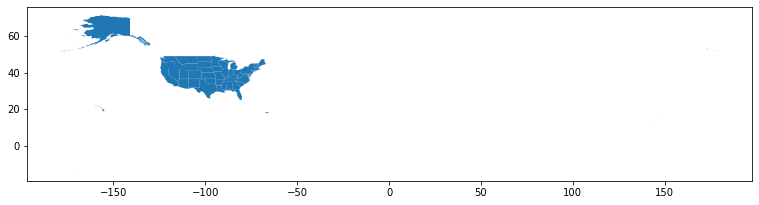

In [12]:
fig, ax = plt.subplots(figsize=(13,8))
states_gdf.plot(ax=ax)

In [13]:
states_gdf.head()

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
0,31,01779792,0400000US31,31,NE,Nebraska,00,198956658395,1371829134,"POLYGON ((-104.05351 41.15726, -104.05267 41.2..."
1,53,01779804,0400000US53,53,WA,Washington,00,172112588220,12559278850,"MULTIPOLYGON (((-122.32834 48.02134, -122.3217..."
2,35,00897535,0400000US35,35,NM,New Mexico,00,314196306401,728776523,"POLYGON ((-109.05017 31.48000, -109.04984 31.4..."
3,46,01785534,0400000US46,46,SD,South Dakota,00,196346981786,3382720225,"POLYGON ((-104.05770 44.99743, -104.05021 44.9..."
4,48,01779801,0400000US48,48,TX,Texas,00,676653171537,19006305260,"POLYGON ((-106.64548 31.89867, -106.64084 31.9..."


## Add data to shape geo-df

In [15]:
states_gdf = states_gdf.set_index('STUSPS').join(state_info.set_index('state'))

In [26]:
states_gdf = states_gdf.reset_index()

In [24]:
# adding population per complaint column
states_gdf['complaint_per_pop'] = states_gdf['count']/states_gdf['population']

In [27]:
# drop rows w/out complaints
states_gdf = states_gdf.dropna(subset=['count'])

## Plotting

In [28]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

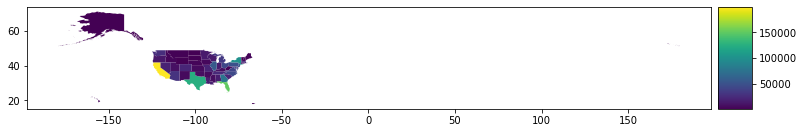

In [29]:
fig, ax = plt.subplots(figsize=(13,8))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
states_gdf.plot(column='count', ax=ax, legend=True, cax=cax)

In [50]:
# Alaska's westernmost islands are messing up my map, so I'm going to remove Alaska, 
# Hawaii and Puerto Rico for today :(

In [51]:
states_etd = states_gdf.loc[states_gdf['STUSPS'].isin(['AK', 'HI', 'PR']) == False]

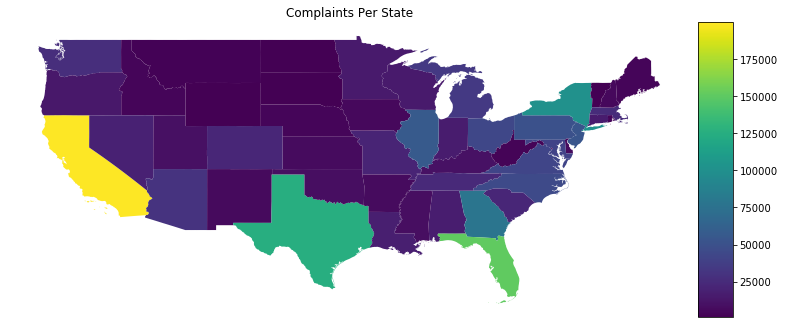

In [57]:
fig, ax = plt.subplots(figsize=(13,8))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
states_etd.plot(column='count', ax=ax, legend=True, cax=cax)
ax.set_title('Complaints Per State')
ax.axis('off')

plt.savefig('images/complaints_per_state.png')

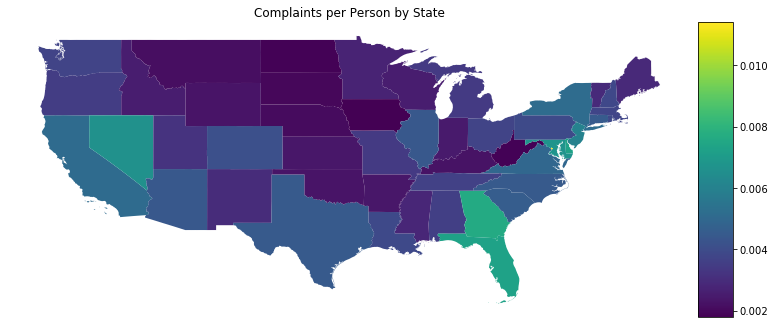

In [58]:
fig, ax = plt.subplots(figsize=(13,8))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
states_etd.plot(column='complaint_per_pop', ax=ax, legend=True, cax=cax)
ax.set_title('Complaints per Person by State')
ax.axis('off')

plt.savefig('images/complaints_per_person_map.png')

In [60]:
states_etd.sort_values('complaint_per_pop', ascending=False)

,STUSPS,STATEFP,STATENS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry,count,population,pop_per_complaint,complaint_per_pop
46,DC,11,01702382,0400000US11,11,District of Columbia,00,158340391,18687198,"POLYGON ((-77.11976 38.93434, -77.10450 38.946...",7796.0,684390.0,87.787327,0.011391
9,GA,13,01705317,0400000US13,13,Georgia,00,149482048342,4422936154,"POLYGON ((-85.60516 34.98468, -85.55259 34.984...",78618.0,10297534.0,130.981887,0.007635
38,FL,12,00294478,0400000US12,12,Florida,00,138949136250,31361101223,"MULTIPOLYGON (((-80.75164 24.85725, -80.72906 ...",151066.0,20596370.0,136.340209,0.007335
29,DE,10,01779781,0400000US10,10,Delaware,00,5045925646,1399985648,"MULTIPOLYGON (((-75.57080 39.62677, -75.55945 ...",6944.0,949495.0,136.736031,0.007313
42,MD,24,01714934,0400000US24,24,Maryland,00,25151100280,6979966958,"MULTIPOLYGON (((-76.04940 37.99031, -76.04881 ...",40540.0,6003435.0,148.086704,0.006753
22,NV,32,01779793,0400000US32,32,Nevada,00,284329506470,2047206072,"POLYGON ((-120.00574 39.22866, -120.00526 39.2...",19282.0,2923171.0,151.601027,0.006596
41,NJ,34,01779795,0400000US34,34,New Jersey,00,19047825980,3544860246,"POLYGON ((-75.55910 39.62906, -75.55945 39.629...",53767.0,8881845.0,165.191381,0.006054
18,NY,36,01779796,0400000US36,36,New York,00,122049149763,19246994695,"MULTIPOLYGON (((-72.03496 41.25546, -72.02944 ...",100780.0,19618323.0,194.664844,0.005137
5,CA,06,01779778,0400000US06,06,California,00,403503931312,20463871877,"MULTIPOLYGON (((-118.60337 33.47810, -118.5987...",199525.0,39140219.0,196.166992,0.005098
33,VA,51,01779803,0400000US51,51,Virginia,00,102257717110,8528531774,"MULTIPOLYGON (((-75.99966 37.84820, -75.99686 ...",41706.0,8414042.0,201.746559,0.004957


## Alaska's western islans are messing up my map!
This isn't the point of this blog, so I'm going to remove Alaska, Hawaii and Puerto Rico

In [32]:
states_gdf

,STUSPS,STATEFP,STATENS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry,count,population,pop_per_complaint,complaint_per_pop
0,NE,31,01779792,0400000US31,31,Nebraska,00,198956658395,1371829134,"POLYGON ((-104.05351 41.15726, -104.05267 41.2...",3978.0,1904901.0,478.858974,0.002088
1,WA,53,01779804,0400000US53,53,Washington,00,172112588220,12559278850,"MULTIPOLYGON (((-122.32834 48.02134, -122.3217...",27156.0,7280023.0,268.081566,0.003730
2,NM,35,00897535,0400000US35,35,New Mexico,00,314196306401,728776523,"POLYGON ((-109.05017 31.48000, -109.04984 31.4...",6247.0,2089570.0,334.491756,0.002990
3,SD,46,01785534,0400000US46,46,South Dakota,00,196346981786,3382720225,"POLYGON ((-104.05770 44.99743, -104.05021 44.9...",1693.0,864012.0,510.343768,0.001959
4,TX,48,01779801,0400000US48,48,Texas,00,676653171537,19006305260,"POLYGON ((-106.64548 31.89867, -106.64084 31.9...",125234.0,27884135.0,222.656267,0.004491
5,CA,06,01779778,0400000US06,06,California,00,403503931312,20463871877,"MULTIPOLYGON (((-118.60337 33.47810, -118.5987...",199525.0,39140219.0,196.166992,0.005098
6,KY,21,01779786,0400000US21,21,Kentucky,00,102279490672,2375337755,"MULTIPOLYGON (((-89.40565 36.52817, -89.39869 ...",10010.0,4446667.0,444.222478,0.002251
7,OH,39,01085497,0400000US39,39,Ohio,00,105828882568,10268850702,"MULTIPOLYGON (((-82.73571 41.60336, -82.71880 ...",43569.0,11639989.0,267.162180,0.003743
8,AL,01,01779775,0400000US01,01,Alabama,00,131174048583,4593327154,"MULTIPOLYGON (((-88.04374 30.51742, -88.03661 ...",17465.0,4864630.0,278.535929,0.003590
9,GA,13,01705317,0400000US13,13,Georgia,00,149482048342,4422936154,"POLYGON ((-85.60516 34.98468, -85.55259 34.984...",78618.0,10297534.0,130.981887,0.007635


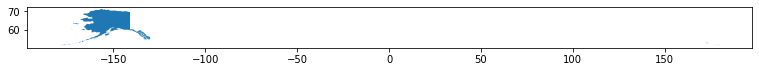

In [37]:
fig, ax = plt.subplots(figsize=(13,8))
states_gdf.loc[states_gdf['STUSPS'] == "AK"].plot(ax=ax)

In [46]:
alaska = states_gdf.loc[states_gdf['STUSPS'] == "AK", 'geometry'].values

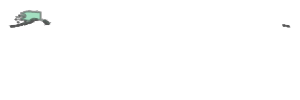

In [48]:
alaska[0]